## Assignment 4
### Project Description
Analyze the Weather phenomenon Data from Massachusetts, USA during the years of 2007 through 2016.  Combine the data with the crop yeild of Apples in Massachusetts during the same years.

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns

The weather data was downloaded from NOAA site. The data set was broken into a several different files. They need to be read and converted to dataframes.<BR><BR>
For this analysis, only a subset of parameters will be considered. <BR>
<B>DX90:</B> Number of days with maximum temperature >= 32.2 degrees Celsius <BR>
<B>DX32:</B> Number of days with maximum temperature <= 0 degrees Celsius <BR>
<B>PRCP:</B> Total Monthly/Annual Precipitation. Given in inches or millimeters <BR>
<B>SNOW:</B> Total Monthly/Annual Snowfall. Given in inches or millimeters depending on user specification. <BR>
<B>TMAX:</B> Monthly/Annual Maximum Temperature <BR>
<B>TMIN:</B> Monthly/Annual Minimum Temperature 

In [37]:
df2007 = pd.read_csv('data/MA2007Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2008 = pd.read_csv('data/MA2008Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2009 = pd.read_csv('data/MA2009Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2010_2012 = pd.read_csv('data/MA2010_2012Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2013_2015 = pd.read_csv('data/MA2013_2015Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2016 = pd.read_csv('data/MA2016Weather.csv', usecols=['STATION', 'NAME','DATE','DX90','DX32', 'PRCP', 'SNOW', 'TMIN', 'TMAX'])
df2007.head()

,STATION,NAME,DATE,DX32,DX90,PRCP,SNOW,TMAX,TMIN
0,USC00190666,"BIRCH HILL DAM, MA US",2007,56.0,5.0,1129.0,1590.0,13.9,0.8
1,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",2007,31.0,14.0,992.2,NaN,15.9,3.1
2,USC00194580,"MAYNARD 2, MA US",2007,39.0,15.0,1141.2,1594.0,15.4,3.1
3,USC00196486,"PLYMOUTH KINGSTON, MA US",2007,NaN,NaN,1136.5,811.0,NaN,5.4
4,USW00014775,"WESTFIELD BARNES MUNICIPAL AIRPORT, MA US",2007,40.0,16.0,1097.8,NaN,15.3,3.1


These dataframe were concatenated and verified.

In [38]:
weatherDf = pd.concat([df2007, df2008, df2009, df2010_2012, df2013_2015, df2016])
weatherDf.head()

,STATION,NAME,DATE,DX32,DX90,PRCP,SNOW,TMAX,TMIN
0,USC00190666,"BIRCH HILL DAM, MA US",2007,56.0,5.0,1129.0,1590.0,13.9,0.8
1,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",2007,31.0,14.0,992.2,NaN,15.9,3.1
2,USC00194580,"MAYNARD 2, MA US",2007,39.0,15.0,1141.2,1594.0,15.4,3.1
3,USC00196486,"PLYMOUTH KINGSTON, MA US",2007,NaN,NaN,1136.5,811.0,NaN,5.4
4,USW00014775,"WESTFIELD BARNES MUNICIPAL AIRPORT, MA US",2007,40.0,16.0,1097.8,NaN,15.3,3.1


In [39]:
weatherDf.tail()

,STATION,NAME,DATE,DX32,DX90,PRCP,SNOW,TMAX,TMIN
95,USW00094720,"HYANNIS BARNSTABLE MUNICIPAL AIRPORT, MA US",2016,10.0,2.0,936.8,NaN,15.6,6.8
96,USC00193402,"HARDWICK 2 ESE, MA US",2016,NaN,NaN,797.8,1279.0,NaN,NaN
97,USW00094724,"VINEYARD HAVEN MARTHAS VINEYARD AIRPORT, MA US",2016,9.0,1.0,NaN,NaN,16.1,5.9
98,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",2016,24.0,26.0,755.8,NaN,16.6,5.7
99,USW00094726,"NEW BEDFORD MUNICIPAL AIRPORT, MA US",2016,12.0,15.0,957.4,NaN,17.0,NaN


Counting the number of observations.

In [40]:
weatherDf.shape

(777, 9)

How many unique stations/locations are there in this data set?

In [46]:
len(weatherDf['STATION'].unique())

120

There are 777 records, measured in 120 locations across Massachusetts between years of 2007 and 2016. <BR>
The average value for the each parameter for each year needs to be calculated.

### Calculating the annual average of each variable.

In [12]:
TMAXavg = weatherDf.groupby('DATE', as_index=False).agg({'TMAX': 'mean'})
TMINavg = weatherDf.groupby('DATE', as_index=False).agg({'TMIN': 'mean'})
DX90avg = weatherDf.groupby('DATE', as_index=False).agg({'DX90': 'mean'})
DX32avg = weatherDf.groupby('DATE', as_index=False).agg({'DX32': 'mean'})
PRCPavg = weatherDf.groupby('DATE', as_index=False).agg({'PRCP': 'mean'})
SNOWavg = weatherDf.groupby('DATE', as_index=False).agg({'SNOW': 'mean'})

"\nfor i in range(3,9):\n    weatherDf.groupby('DATE')[[weatherDf.columns[i]]].mean() \n    avgDf = weatherDf.groupby('DATE')[[weatherDf.columns[i]]].mean() \n"

In [13]:
# Checking how th aggregation was performed.
SNOWavg

,DATE,SNOW
0,2007,1285.536585
1,2008,1264.261905
2,2009,1407.175000
3,2010,964.454545
4,2011,1577.076923
5,2012,589.705882
6,2013,1685.882353
7,2014,1380.840000
8,2015,2228.380000
9,2016,1116.583333


Merge these dataframe containing the annual averages and get a new dataframe of averaged data.

In [14]:
# Merge these dataframes
from functools import reduce
dfs = [TMAXavg, TMINavg, DX90avg, DX32avg, PRCPavg, SNOWavg]
avgDf = reduce(lambda left,right: pd.merge(left,right,on='DATE'), dfs)
avgDf

,DATE,TMAX,TMIN,DX90,DX32,PRCP,SNOW
0,2007,14.851163,4.130952,9.697674,36.627907,1119.209434,1285.536585
1,2008,15.006383,4.278723,5.765957,26.170213,1470.713793,1264.261905
2,2009,14.197917,3.871429,3.979167,38.250000,1303.837288,1407.175000
3,2010,15.744000,5.222917,16.740000,27.960000,1296.994366,964.454545
4,2011,15.294340,4.775926,6.754717,27.962264,1458.481818,1577.076923
5,2012,16.337500,5.621429,11.517857,12.017857,1054.480247,589.705882
6,2013,14.956140,4.192982,11.982456,32.666667,1157.483529,1685.882353
7,2014,14.496364,3.768519,3.563636,39.872727,1255.734940,1380.840000
8,2015,15.107273,3.715385,8.200000,44.636364,1039.558025,2228.380000
9,2016,16.011111,4.818519,14.666667,22.148148,955.928125,1116.583333


This is the data that containes the yeild of apples, measured in pounds per acre.  This date was obtained from United States Department of Agricalture Website.  

In [15]:
dfApples = pd.read_csv('data/MAApples.csv', usecols=['Year', 'Value'])
dfApples.columns = ['DATE', 'LB per Acre']
dfApples

,DATE,LB per Acre
0,2016,"10,000"
1,2015,"14,400"
2,2014,"14,000"
3,2013,"14,500"
4,2012,"9,330"
5,2011,"12,000"
6,2010,"10,900"
7,2009,"12,100"
8,2008,"10,800"
9,2007,"9,630"


Check the Data types

In [16]:
dfApples['DATE'].dtype

dtype('int64')

In [17]:
dfApples['LB per Acre'].dtype

dtype('O')

LB per Acre column is string data type.  Need to change this to int type

In [18]:
dfApples['LB per Acre'] = dfApples['LB per Acre'].apply(lambda x: x.replace(',', ''))

In [19]:
dfApples['LB per Acre'] = dfApples['LB per Acre'].apply(lambda x: int(x))

#### Now merging this dataframe with the aggregated weather data

In [21]:
# Merge this with the weather data
AppleWeather = pd.merge(avgDf,dfApples,on='DATE')
AppleWeather

,DATE,TMAX,TMIN,DX90,DX32,PRCP,SNOW,LB per Acre
0,2007,14.851163,4.130952,9.697674,36.627907,1119.209434,1285.536585,9630
1,2008,15.006383,4.278723,5.765957,26.170213,1470.713793,1264.261905,10800
2,2009,14.197917,3.871429,3.979167,38.250000,1303.837288,1407.175000,12100
3,2010,15.744000,5.222917,16.740000,27.960000,1296.994366,964.454545,10900
4,2011,15.294340,4.775926,6.754717,27.962264,1458.481818,1577.076923,12000
5,2012,16.337500,5.621429,11.517857,12.017857,1054.480247,589.705882,9330
6,2013,14.956140,4.192982,11.982456,32.666667,1157.483529,1685.882353,14500
7,2014,14.496364,3.768519,3.563636,39.872727,1255.734940,1380.840000,14000
8,2015,15.107273,3.715385,8.200000,44.636364,1039.558025,2228.380000,14400
9,2016,16.011111,4.818519,14.666667,22.148148,955.928125,1116.583333,10000


### Check the correlations between the apple yeild and the weather parameters.

<IPython.core.display.Javascript object>


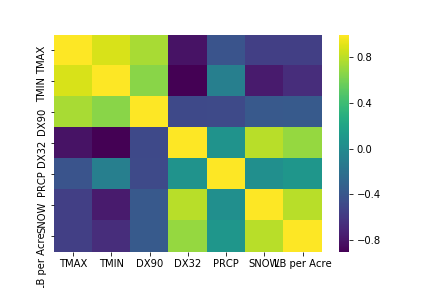

In [25]:
%matplotlib notebook
AppleWeather_corr = AppleWeather.iloc[ :, 1:8].corr()
sns.heatmap(AppleWeather_corr, cmap='viridis')

In [54]:
AppleWeather_corr

,TMAX,TMIN,DX90,DX32,PRCP,SNOW,LB per Acre
TMAX,1.000000,0.884577,0.753171,-0.815094,-0.408098,-0.550298,-0.554759
TMIN,0.884577,1.000000,0.661728,-0.904764,-0.088250,-0.765731,-0.665274
DX90,0.753171,0.661728,1.000000,-0.481548,-0.479644,-0.379083,-0.374771
DX32,-0.815094,-0.904764,-0.481548,1.000000,0.071689,0.796941,0.699641
PRCP,-0.408098,-0.088250,-0.479644,0.071689,1.000000,0.033710,0.094419
SNOW,-0.550298,-0.765731,-0.379083,0.796941,0.033710,1.000000,0.796566
LB per Acre,-0.554759,-0.665274,-0.374771,0.699641,0.094419,0.796566,1.000000


The parameter with high correlations, either positive or negative, are DX32, SNOW, and TMIN/TMAX

Plotting the relationship between the apple production and snowfalls.

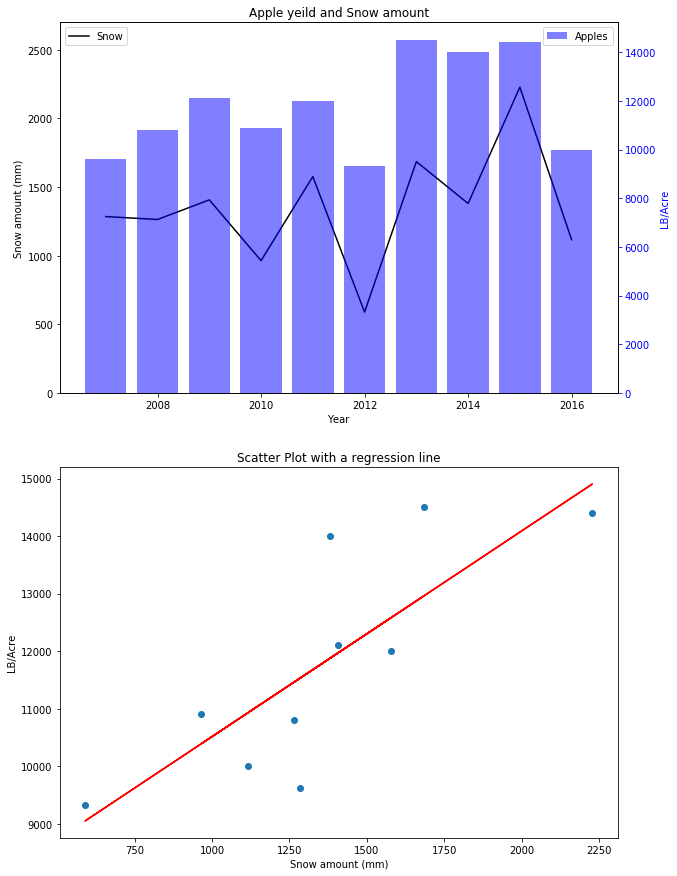

In [53]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10.0,15.0]
fig, (ax1, ax2) = plt.subplots(2, 1)

snow = ax1.plot(AppleWeather['DATE'], AppleWeather['SNOW'], color='black', label='Snow')
ax1.set_title('Apple yeild and Snow amount')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Snow amount (mm)', color='black')
ax1.tick_params('y', colors='black')
ax1.set_ylim(0,2700)
ax1.legend(loc='upper left')
# Share X axis
ax3 = ax1.twinx()
apple = ax3.bar(AppleWeather['DATE'], AppleWeather['LB per Acre'], color = 'b', alpha=.5, label = 'Apples')
ax3.set_ylabel('LB/Acre', color='b')
ax3.tick_params('y', colors='b')
ax3.legend()
#plt.legend(handles = [snow, apple], labels =['Snow', 'Apple'])

# The second graph
ax2.scatter(AppleWeather['SNOW'], AppleWeather['LB per Acre'])

# Adding a regression line, fit with np.polyfit
m, b = np.polyfit(AppleWeather['SNOW'], AppleWeather['LB per Acre'], 1)

#plt.plot(x, y, '.')
ax2.plot(AppleWeather['SNOW'], m*AppleWeather['SNOW'] + b, '-', color='r')
ax2.set_title('Scatter Plot with a regression line')
ax2.set_xlabel('Snow amount (mm)')
ax2.set_ylabel('LB/Acre')

plt.savefig('Assignment4.png') 